<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Need)</span></div>

## 1 Random Numbers

### 1.1 Real and Pseudo Random Numbers

A **random number generator** (RNG) provides random numbers. Real random number generators use random physical processes (e.g. radioactivity or noise in circuits) to generate random numbers.

Some algorithms can numbers that approximate real random numbers. Because a deterministic algorithm generates these numbers, some argue that these RNG are not ‘truly’ random. So we call them **pseudo RNG** (PRNG).

Every time we use a PRNG, it gives us a new number. However, numbers begin to repeat once you generated enough numbers. Luckily, modern PRNG algorithms are sophisticated enough that it takes (for a PRNG called the Mersenne Twister) about 
$10^{19937}−1$ times before the numbers repeat, which is good enough for us and most simulations.

Typical PRNG produces **uniformly distributed** numbers between 0 and 1.


### 1.2 NumPy’s PRNG

In [1]:
#to use NumPy to generate random numbers

np.random.rand()                # Give one number

0.9690466745757604

In [2]:
np.random.rand(10)              # Give ten numbers`

array([0.44330222, 0.40357917, 0.88265046, 0.09011555, 0.7267639 ,
       0.46707968, 0.19835883, 0.9438671 , 0.19799355, 0.18123511])

Two things to note:
1. **All** the numbers are between 0 and 1
2. The numbers are (more or less) evenly (i.e. uniformly) distributed to cover the interval between 0 and 1.

To convince ourselves that the second point is true, we can generate a large set of numbers and check if the percentages of numbers match. 

In [7]:
#generate 10000 random numbers
n = 10000
random_numbers = np.random.rand(n)

# The numbers less than .5 must be about 50%
np.sum(random_numbers < .5) / n * 100

50.21

In [8]:
# The numbers less than .25 must be about 25%
np.sum(random_numbers < .25) / n * 100

25.88

In [9]:
# The numbers more than .75 must be about 25%
np.sum(random_numbers > .75) / n * 100

25.71

### 1.3 A simple graphical test

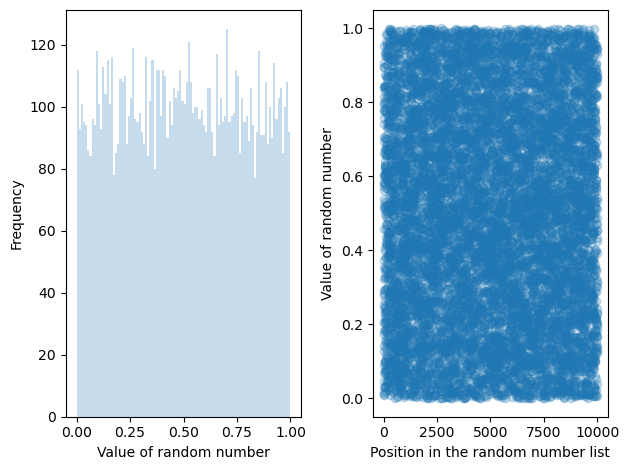

In [14]:
#We can als convince ourselves of the uniformity of the PRNG by plotting the numbers as a scatter plot or a histogram
from matplotlib import pyplot as plt
plt.style.use('default')

n = 10000
random_numbers = np.random.rand(n)

fig, ax = plt.subplots(nrows=1, ncols=2)

#histogram
axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

#scatterplot
axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

plt.tight_layout()
plt.show()

### 1.4 Uniformly beyond \([0,1)\)

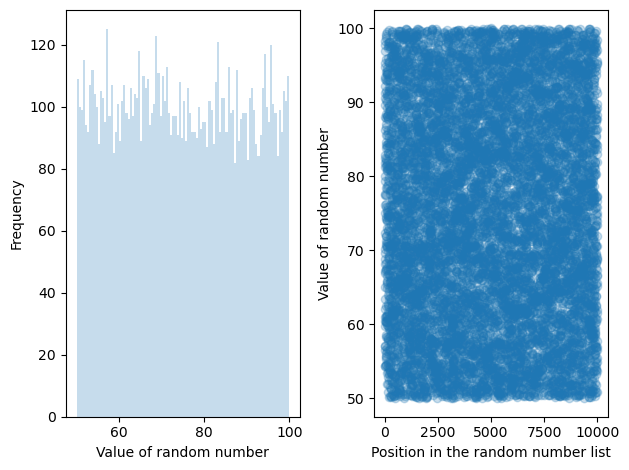

In [15]:
#We usually need random numbers distributed over a range other than 0 and 1
#We can use np.random.uniform() for this
#To generate a large set of random numbers in the interval [50, 100] using np.random.uniform()

n = 10000
random_numbers = np.random.uniform(low=50, high=100, size=n)

#representation in histogram and scatter plot

from matplotlib import pyplot as plt
plt.style.use('default')

fig, ax = plt.subplots(nrows=1, ncols=2)

#histogram
axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

#scatterplot
axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

plt.tight_layout()
plt.show()

### 1.5 ‘seeding’ a PRNG

Sometimes, we need PRNG to generate the **same** set of numbers e.g. when debugging. This can be achieved by specifying a **seed**, the integer number that 'kicks off' the PRNG algorithm. Usually, we do not have to seed the PRNG. It does it automatically by using 'some' number (e.g. the number of milliseconds since January 1970) internally.

In [16]:
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

array([70, 70, 35, 69, 68, 90, 38, 30, 91, 65])

In [17]:
np.random.randint(0, 100, 10)     # Another ten integers between 0 and 100

array([62, 50, 61, 92, 14, 50, 33, 51, 38, 50])

In [18]:
np.random.seed(1234)              # Specifying a seed
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

In [19]:
np.random.seed(1234)
np.random.randint(0, 100, 10)     # Same ten integers between 0 and 100

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

## 2 Simulating a Magic-8 Ball

An example of using random numbers is that of simulating a Magic-8 ball

The simulation will be in a function called shake_magic_8()

In [20]:
def shake_magic_8():
    '''
    Function to simulate a Magic-8 ball!
    '''
    options = ['It is certain.', 'It is decidedly so.',
               'Without a doubt.', 'Yes definitely.',
               'You may rely on it.', 'As I see it, yes.',
               'Most likely.', 'Outlook good.',
               'Yes.', 'Signs point to yes.',
               'Reply hazy, try again.', 'Ask again later.',
               'Better not tell you now.', 'Cannot predict now.',
               'Concentrate and ask again.', 'Don\'t count on it.',
               'My reply is no.', 'My sources say no.',
               'Outlook not so good.', 'Very doubtful.']

    return np.random.choice(options)

questions = ['Will I be pretty?',
             'Will I be rich?',
             'Will I be in trouble?']

for question in questions:
    print(f'Q: {question}')
    print(f'A: {shake_magic_8()}\n')

Q: Will I be pretty?
A: Ask again later.

Q: Will I be rich?
A: Better not tell you now.

Q: Will I be in trouble?
A: My reply is no.



np.random.choice() picks one of the options randomly so the chances of getting each is equal

## 3 Flipping Coins

### 3.1 A fair coin

In [21]:
#to simulate a fair coin flip

np.random.choice(['Head', 'Tails'])

'Head'

In [22]:
#to simulate 10 flips

no_of_coins = 10
np.random.choice(['Head', 'Tails'], no_of_coins)

array(['Tails', 'Head', 'Tails', 'Tails', 'Head', 'Head', 'Tails', 'Head',
       'Head', 'Tails'], dtype='<U5')

In [23]:
#alternatively, if we consider any number in (0, .5] to be Tails and (.5, 1) to be Heads, we can do the following:
def flip_coins(no_of_coins=1, probability=.5):
    '''
    Returns the number of values greater that 
    `probability` (considered as 'Heads').
    '''
    results = np.random.rand(no_of_coins)
    no_of_heads = np.sum(results > probability)
    return no_of_heads

no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 51.60%


Creating a function that gives the number of heads allow me to flip coins more times easily. probability=.5 since it is a fair coin

### 3.2 A biased coin

Advantage of second way of simulating coins is that we can easily simulate a biased coin by changing probability. Say I want a probability of .7 for a Head. Since we need to increase the chance of a number being considered a Head, we have to make probability=.3


In [25]:
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins, probability = .3)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 71.40%


### 3.3 A flipping experiment

Access to a good PRNG allows you to run quick experiments. These will help you gain insights into more theoretical models of the same experiments. So, you can start using computers to better understand science.

Say we flip 10 fair coins in one go. What is the probability that 7 of them will come out Heads? There is an elegant theoretical answer to this question which we will come to later. But first, let’s see if we can get a solution using our PRNG.

We can flip 10 coins several thousand times and count the number of heads i.e. use flip_coins(10) many times and keep score.

In [26]:
no_of_repeats = 10_000
result = [flip_coins(no_of_coins=10) for _ in range(no_of_repeats)]
no_of_heads, heads_counts = np.unique(result, return_counts=True)

In [30]:
#np.unique() with return_counts=True returns the unique values(of Heads) in the list and how many times they occur.
#We can get the probabilities by dividing the array with the counts by the number fo repeats

heads_probability = heads_counts/no_of_repeats

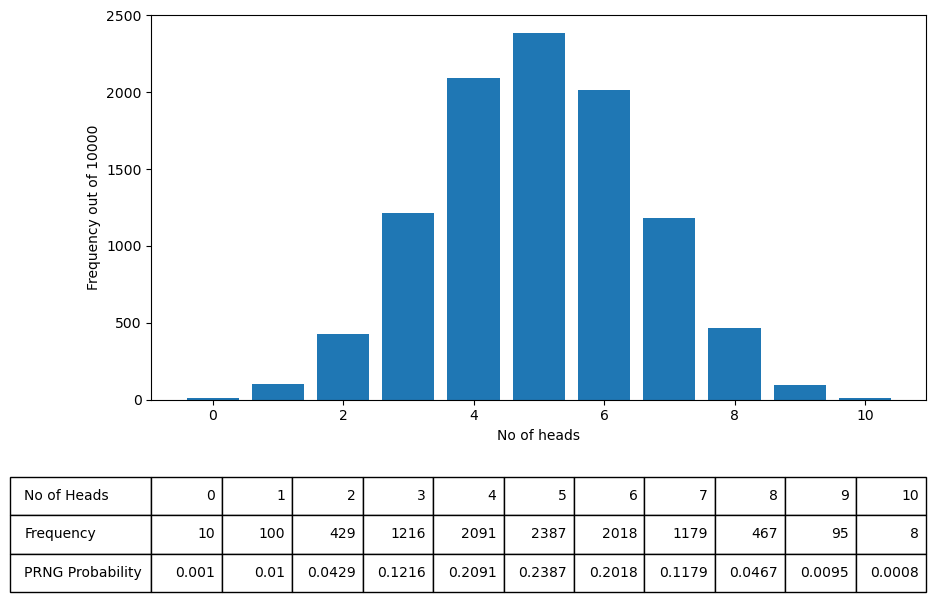

In [79]:
#plot this data

plt.rcParams['figure.figsize'] = (10,5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])

The theoretical explanation of how many times each head should appear is described by the **binomial distribution**. 

SciPy has various functions to calculate many of these important distributions.

In [39]:
#import machinery for binomial distribution
from scipy.stats import binom

Binomial distribution is discrete (i.e. because you have Heads or Tails, no half or quarter Heads). For such distributions, you get the various probabilities using the distribution’s pmf() (probability mass function or discrete density function). pmf() just gives the probabilities for the various possibilities of the discrete distributions.

In [40]:
binom.pmf(k=7, n=10, p=.5)

0.11718750000000004

Binomial distribution gives us the probability of getting 7 heads when you throw 10 fair (p=.5) coins.

In [41]:
#to calculate the rest of the values
binomial_probabilities = binom.pmf(k=no_of_heads, n=10, p=.5)

## Exercise 1 :  12C, 13C

In [76]:
#qn1
def c_13(no_of_carbons=1, probability=.9889):
    results = np.random.rand(no_of_carbons)
    no_of_13 = np.sum(results > probability)
    return no_of_13

no_of_repeats = 10000
result = [c_13(no_of_carbons=27) for _ in range(no_of_repeats)]
no_of_13, thirteen_counts = np.unique(result, return_counts=True)

mean = sum(no_of_13 * thirteen_counts)/sum(thirteen_counts)
print(mean)


summation = sum(((no_of_13 - mean)**2)*thirteen_counts)
standard_deviation = (summation/no_of_repeats)**0.5
print(standard_deviation)

0.3064
0.5523758140976123


In [65]:
#qn2

thirteen_probability = thirteen_counts/no_of_repeats
probability_no_13_c = thirteen_probability[0]
print(probability_no_13_c)

0.7395
